In [73]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [74]:
# This should print something along the lines of '2.0.0-rc1'
tf.__version__

'2.4.0'

In [75]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [77]:
# MNIST
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [78]:
# Pre-process data
img_rows, img_cols, channels = 28, 28, 1 # 32, 32, 3
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, img_rows, img_cols, channels))
x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [79]:
model_000 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# l2: 0.01
model_100 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_110 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# l2: 0.03
model_200 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_220 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# l2: 0.1
model_300 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_330 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [80]:
model_000.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_100.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_110.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_200.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_220.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_300.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_330.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [81]:
history_000 = model_000.fit(x_train, y_train, epochs=10, verbose=0)
history_100 = model_100.fit(x_train, y_train, epochs=10, verbose=0)
history_110 = model_110.fit(x_train, y_train, epochs=10, verbose=0)
history_200 = model_200.fit(x_train, y_train, epochs=10, verbose=0)
history_220 = model_220.fit(x_train, y_train, epochs=10, verbose=0)
history_300 = model_300.fit(x_train, y_train, epochs=10, verbose=0)
history_330 = model_330.fit(x_train, y_train, epochs=10, verbose=0)

In [82]:
print("000 : ", history_000.history['accuracy'][-3:])
print("100 : ", history_100.history['accuracy'][-3:])
print("110 : ", history_110.history['accuracy'][-3:])
print("200 : ", history_200.history['accuracy'][-3:])
print("220 : ", history_220.history['accuracy'][-3:])
print("300 : ", history_300.history['accuracy'][-3:])
print("330 : ", history_330.history['accuracy'][-3:])

000 :  [0.9905666708946228, 0.9919666647911072, 0.9919499754905701]
100 :  [0.958216667175293, 0.9606333374977112, 0.9609166383743286]
110 :  [0.9525166749954224, 0.9514833092689514, 0.9543499946594238]
200 :  [0.9473333358764648, 0.9488000273704529, 0.9500499963760376]
220 :  [0.9354333281517029, 0.9363833069801331, 0.9367166757583618]
300 :  [0.9305333495140076, 0.9331333041191101, 0.9334333539009094]
330 :  [0.9062333106994629, 0.9058666825294495, 0.9055666923522949]


In [83]:
# Assess base model accuracy on regular images
print("Model_000 Base accuracy on regular images:", model_000.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_100 Base accuracy on regular images:", model_100.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_110 Base accuracy on regular images:", model_110.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_200 Base accuracy on regular images:", model_200.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_220 Base accuracy on regular images:", model_220.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_300 Base accuracy on regular images:", model_300.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_330 Base accuracy on regular images:", model_330.evaluate(x=x_test, y=y_test, verbose=0))

Model_000 Base accuracy on regular images: [0.12584960460662842, 0.9693999886512756]
Model_100 Base accuracy on regular images: [0.2171560823917389, 0.9621999859809875]
Model_110 Base accuracy on regular images: [0.2522684335708618, 0.9534000158309937]
Model_200 Base accuracy on regular images: [0.25425514578819275, 0.9589999914169312]
Model_220 Base accuracy on regular images: [0.34896397590637207, 0.9399999976158142]
Model_300 Base accuracy on regular images: [0.36452314257621765, 0.9276999831199646]
Model_330 Base accuracy on regular images: [0.45984894037246704, 0.9140999913215637]


In [84]:
# Function to create adversarial pattern
def adversarial_pattern(image, label, model):

    image = tf.cast(image, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        
        label = label.reshape(1, -1)

        loss = tf.keras.losses.CategoricalCrossentropy()
        loss = loss(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

five
three


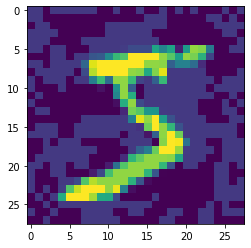

In [85]:
# Create a signle adversarial example
image = x_train[0]
image_label = y_train[0]

perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label, model_100).numpy()
adversarial = image + perturbations * 0.1

print(labels[model_100.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[model_100.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))

plt.show()

In [86]:
# Adversarial data generator
def generate_adversarials(batch_size, model):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label, model).numpy()
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

Prediction: four , Truth: four


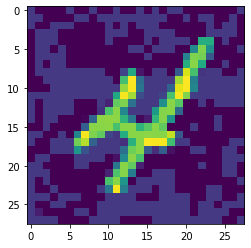

Prediction: two , Truth: seven


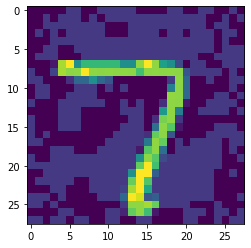

Prediction: nine , Truth: seven


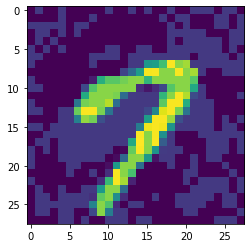

Prediction: three , Truth: five


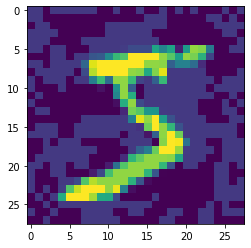

Prediction: seven , Truth: one


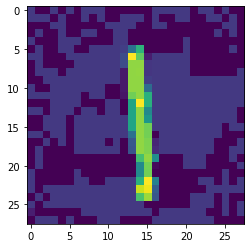

In [87]:
# Generate and visualize 5 adversarial images
adversarials, correct_labels = next(generate_adversarials(5, model_100))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model_100.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

In [88]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_011))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_100))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_100.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [3.9527971744537354, 0.2409999966621399]


In [89]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_022))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_110))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_110.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [3.955531120300293, 0.1720000058412552]


In [90]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_003))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_200))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_200.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [3.451889991760254, 0.23800000548362732]


In [91]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_044))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_220))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_220.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [3.8261051177978516, 0.2070000022649765]


In [92]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_055))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_300))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_300.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [3.8280208110809326, 0.22599999606609344]


In [93]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
# x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_055))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_330))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_330.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [3.77844500541687, 0.18799999356269836]


## Case 1
> **계층별 Regularization Control 을 적용하지 않은 모델에서 만든 Adversarial 이미지로** 

> **계층별 Regularization Control 을 적용하지 않은 모델에 입력하여 성능을 측정**

In [99]:
x_adversarial, y_adversarial = next(generate_adversarials(10000, model_000))

# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_000.evaluate(x=x_adversarial, y=y_adversarial, verbose=0))

Base accuracy on adversarial images: [13.892423629760742, 0.12099999934434891]


## Case 2
> **계층별 Regularization Control 을 적용하지 않은 모델에서 만든 Adversarial 이미지로** 

> **계층별 Regularization Control 을 적용한 모델에 입력하여 성능을 측정**

In [119]:
x_adversarial, y_adversarial = next(generate_adversarials(10000, model_000))
print("Base accuracy on adversarial images:", model_000.evaluate(x=x_adversarial, y=y_adversarial, verbose=0))

Base accuracy on adversarial images: [7.0989670753479, 0.31779998540878296]


In [95]:
x_adversarial, y_adversarial = next(generate_adversarials(10000, model_000))
print("Base accuracy on adversarial images:", model_200.evaluate(x=x_adversarial, y=y_adversarial, verbose=0))

Base accuracy on adversarial images: [1.118910789489746, 0.7135999798774719]


In [118]:
x_adversarial, y_adversarial = next(generate_adversarials(10000, model_000))
print("Base accuracy on adversarial images:", model_220.evaluate(x=x_adversarial, y=y_adversarial, verbose=0))

Base accuracy on adversarial images: [0.7384403347969055, 0.8011000156402588]


## Case 3
> **계층별 Regularization Control을 적용한 모델에서 만든 Adversarial 이미지로**

> **계층별 Regularization Control을 적용하지 않은 모델에 입력하여 성능을 측정**

In [96]:
x_adversarial, y_adversarial = next(generate_adversarials(10000, model_200))
print("Base accuracy on adversarial images:", model_000.evaluate(x=x_adversarial, y=y_adversarial, verbose=0))

Base accuracy on adversarial images: [4.5454630851745605, 0.39629998803138733]


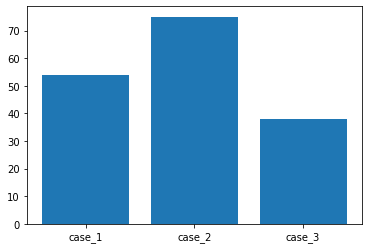

In [97]:
labels = ['case_1', 'case_2', 'case_3']
# lists of acc results 
results = [54, 75, 38]

plt.bar(x=labels, height=results)
plt.show()

<Figure size 1440x1440 with 0 Axes>

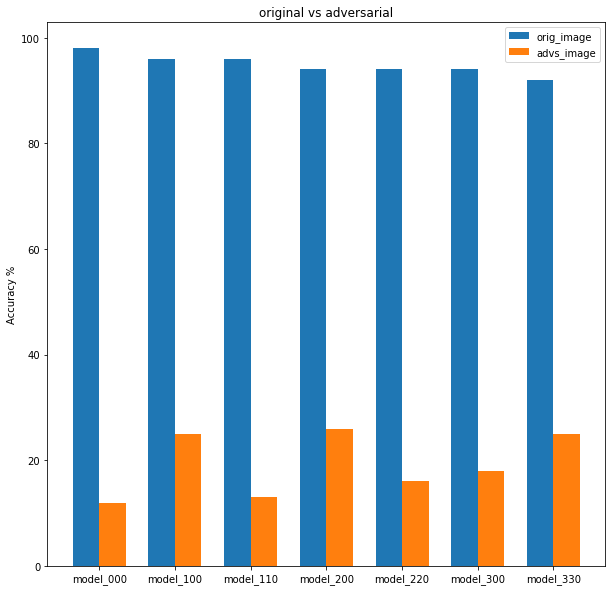

In [113]:
labels = ['model_000', 'model_100', 'model_110', 'model_200', 'model_220', 'model_300', 'model_330']
# lists of acc results 
orig_image = [98, 96, 96, 94, 94, 94, 92]
advs_image = [12, 25, 13, 26, 16, 18, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, orig_image, width, label='orig_image')
rects2 = ax.bar(x + width/2, advs_image, width, label='advs_image')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy %')
ax.set_title('original vs adversarial')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Case 4
> **Dense로만 구성된 Network(model_000) adversarial training 시킨 후, adversarial attack accuracy 측정하기**

In [102]:
# Generate adversarial data
x_adversarial_train, y_adversarial_train = next(generate_adversarials(7000, model_000))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(3000, model_000))

In [103]:
# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_000.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [13.891939163208008, 0.11866666376590729]


In [104]:
# Learn from adversarial data
model_000.fit(x_adversarial_train, y_adversarial_train,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.9460 - val_loss: 0.9978 - val_accuracy: 0.7553
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.0444 - val_accuracy: 0.7549
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 7.0368e-04 - accuracy: 1.0000 - val_loss: 1.0786 - val_accuracy: 0.7550
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 4.2677e-04 - accuracy: 1.0000 - val_loss: 1.1039 - val_accuracy: 0.7548
Epoch 5/10
219/219 [==============================] - 1s 2ms/step - loss: 2.9023e-04 - accuracy: 1.0000 - val_loss: 1.1257 - val_accuracy: 0.7552
Epoch 6/10
219/219 [==============================] - 1s 2ms/step - loss: 2.1142e-04 - accuracy: 1.0000 - val_loss: 1.1433 - val_accuracy: 0.7553
Epoch 7/10
219/219 [==============================] - 1s 2ms/step - loss: 1.5982e-04 - accuracy: 1.0000 - val_loss: 1.1594 - val_acc

In [105]:
# Assess defended model on adversarial data
print("Defended accuracy on adversarial images:", model_000.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

# Assess defended model on regular data
print("Defended accuracy on regular images:", model_000.evaluate(x=x_test, y=y_test, verbose=0))

Defended accuracy on adversarial images: [6.841576396254823e-05, 1.0]
Defended accuracy on regular images: [1.1988201141357422, 0.7572000026702881]


In [108]:
x_adversarial_test, y_adversarial_test = next(generate_adversarials(3000, model_000))
print("Defended accuracy on adversarial images:", model_000.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Defended accuracy on adversarial images: [6.997132301330566, 0.3149999976158142]


- 처음에 만든 adversarial train, test set은 100% 정확도를 보여주지만,
- 새로만든 adversarial test set은 31% 정확도로 나타남.

<BarContainer object of 2 artists>

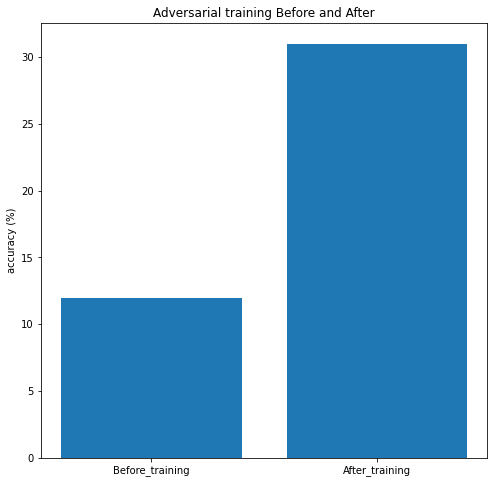

In [117]:
plt.figure(figsize=(8,8))
labels = ['Before_training', 'After_training']
acc = [12, 31]
plt.title('Adversarial training Before and After')
plt.ylabel('accuracy (%)')
plt.bar(labels, acc)